In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append("lib")

import lib

import torch
torch.set_default_dtype(torch.float64)

from functorch import vmap
from torch.utils.data import DataLoader
import tqdm

/home/peiyi/mambaforge3/envs/rom/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
coords_x, coords_y, _ = lib.utils.read_coords("2d_burger_data/time_step_0.csv")
coords = torch.stack((coords_x, coords_y), dim=1)

In [3]:
num_steps = 501
num_nodes = coords_x.shape[0]

datas = lib.utils.read_data(num_steps, num_nodes, '2d_burger_data/time_step_', 'vel_0')
datas.shape

torch.Size([501, 14641])

In [4]:
N = datas.shape[1]
n = 20
mu = int(np.ceil(N/40))
neighbours = lib.utils.topk_neighbours(coords, mu)

In [5]:
nrbs = lib.nrbs.NRBS(N=N, n=n, mu=mu, neighbours=neighbours)

In [6]:
batch_size = 30
train_data = DataLoader(datas, batch_size=batch_size, shuffle=True)

In [7]:
ed = lib.nrbs.EncoderDecoder(nrbs)

In [8]:
ed.train(train_data_loader=train_data)

100%|██████████| 17/17 [01:25<00:00,  5.04s/it]

Itr 0, loss = 12419.575727209658


In [14]:
optim = torch.optim.Adam(nrbs.parameters(), 1e-3)
loss_func = torch.nn.MSELoss(reduction='none')

for i in range(1):
    nrbs.train()
    accumulate_loss = 0
    for x in tqdm.tqdm(train_data):
        approximates = nrbs(x)
        # loss = torch.sum(loss_func(x, approximates), dim=1)
        loss = torch.sum(loss_func(x, approximates))
        accumulate_loss = accumulate_loss + loss.item()
        loss.backward()
        optim.step()
        optim.zero_grad()
    print("Itr {:}, loss = {:}".format(i, accumulate_loss))

100%|██████████| 17/17 [01:21<00:00,  4.81s/it]


Itr 0, loss = 7682.9838855912785


100%|██████████| 17/17 [01:20<00:00,  4.74s/it]


Itr 1, loss = 3837.3593543144884


100%|██████████| 17/17 [01:19<00:00,  4.65s/it]


Itr 2, loss = 1917.0672506823792


100%|██████████| 17/17 [01:17<00:00,  4.59s/it]


Itr 3, loss = 1249.4202988180646


100%|██████████| 17/17 [01:20<00:00,  4.73s/it]


Itr 4, loss = 790.6985335982648


100%|██████████| 17/17 [01:18<00:00,  4.64s/it]


Itr 5, loss = 628.7293453718777


100%|██████████| 17/17 [01:19<00:00,  4.66s/it]


Itr 6, loss = 477.65391236004245


100%|██████████| 17/17 [01:18<00:00,  4.62s/it]


Itr 7, loss = 396.3153661139314


100%|██████████| 17/17 [01:21<00:00,  4.81s/it]


Itr 8, loss = 363.41588503973315


100%|██████████| 17/17 [01:21<00:00,  4.82s/it]


Itr 9, loss = 332.5922144457247


100%|██████████| 17/17 [01:23<00:00,  4.88s/it]


Itr 10, loss = 296.3422642062657


100%|██████████| 17/17 [01:20<00:00,  4.75s/it]


Itr 11, loss = 252.99836478769197


100%|██████████| 17/17 [01:16<00:00,  4.52s/it]


Itr 12, loss = 219.73400586723386


100%|██████████| 17/17 [01:20<00:00,  4.76s/it]


Itr 13, loss = 206.71660292955335


100%|██████████| 17/17 [01:16<00:00,  4.50s/it]


Itr 14, loss = 197.1983280225455


100%|██████████| 17/17 [01:17<00:00,  4.56s/it]


Itr 15, loss = 185.16951925427009


100%|██████████| 17/17 [01:18<00:00,  4.63s/it]


Itr 16, loss = 171.92827796500555


100%|██████████| 17/17 [01:16<00:00,  4.51s/it]


Itr 17, loss = 165.42755604467123


100%|██████████| 17/17 [01:22<00:00,  4.85s/it]


Itr 18, loss = 185.21966775354642


100%|██████████| 17/17 [01:19<00:00,  4.70s/it]


Itr 19, loss = 134.8532651797188


100%|██████████| 17/17 [01:19<00:00,  4.65s/it]


Itr 20, loss = 130.0895931641095


100%|██████████| 17/17 [01:21<00:00,  4.79s/it]


Itr 21, loss = 117.15274282445607


100%|██████████| 17/17 [01:21<00:00,  4.82s/it]


Itr 22, loss = 105.96358529280771


100%|██████████| 17/17 [01:21<00:00,  4.79s/it]


Itr 23, loss = 101.29215922996181


100%|██████████| 17/17 [01:23<00:00,  4.93s/it]


Itr 24, loss = 103.05814314065346


100%|██████████| 17/17 [01:20<00:00,  4.76s/it]


Itr 25, loss = 93.2653391445011


100%|██████████| 17/17 [01:20<00:00,  4.75s/it]


Itr 26, loss = 83.7677268207216


100%|██████████| 17/17 [01:20<00:00,  4.72s/it]


Itr 27, loss = 79.02222832562614


100%|██████████| 17/17 [01:18<00:00,  4.59s/it]


Itr 28, loss = 76.34676441299301


100%|██████████| 17/17 [01:19<00:00,  4.70s/it]


Itr 29, loss = 76.78753144940066


100%|██████████| 17/17 [01:19<00:00,  4.69s/it]


Itr 30, loss = 78.8118900919617


100%|██████████| 17/17 [01:22<00:00,  4.84s/it]


Itr 31, loss = 87.81836274167206


100%|██████████| 17/17 [01:20<00:00,  4.74s/it]


Itr 32, loss = 92.37978308798081


100%|██████████| 17/17 [01:18<00:00,  4.60s/it]


Itr 33, loss = 81.5585889061612


100%|██████████| 17/17 [01:20<00:00,  4.71s/it]


Itr 34, loss = 67.05673270933033


100%|██████████| 17/17 [01:19<00:00,  4.66s/it]


Itr 35, loss = 65.71474208302415


100%|██████████| 17/17 [01:20<00:00,  4.75s/it]


Itr 36, loss = 64.99451523290507


100%|██████████| 17/17 [01:20<00:00,  4.71s/it]


Itr 37, loss = 67.12810860631325


100%|██████████| 17/17 [01:23<00:00,  4.91s/it]


Itr 38, loss = 72.12885756381641


100%|██████████| 17/17 [01:22<00:00,  4.88s/it]


Itr 39, loss = 110.27113843189882


100%|██████████| 17/17 [01:16<00:00,  4.51s/it]


Itr 40, loss = 71.15985024650223


100%|██████████| 17/17 [01:19<00:00,  4.69s/it]


Itr 41, loss = 55.18550135058604


100%|██████████| 17/17 [01:22<00:00,  4.83s/it]


Itr 42, loss = 51.64872328596818


100%|██████████| 17/17 [01:18<00:00,  4.62s/it]


Itr 43, loss = 51.066230723446814


100%|██████████| 17/17 [01:21<00:00,  4.80s/it]


Itr 44, loss = 49.65505207238171


100%|██████████| 17/17 [01:18<00:00,  4.61s/it]


Itr 45, loss = 48.349082781750845


100%|██████████| 17/17 [01:24<00:00,  4.95s/it]


Itr 46, loss = 45.60611757378784


100%|██████████| 17/17 [01:26<00:00,  5.06s/it]


Itr 47, loss = 46.076775560737374


100%|██████████| 17/17 [01:24<00:00,  4.94s/it]


Itr 48, loss = 43.841038434967544


100%|██████████| 17/17 [01:25<00:00,  5.02s/it]

Itr 49, loss = 43.051548857647894


In [9]:
loss = torch.sum(loss_func(x, approximates))

In [10]:
loss

tensor(619.3880, grad_fn=<SumBackward0>)

In [11]:
encoded = nrbs.encode(datas)
decoded = nrbs.decode(encoded)

In [24]:
approximate = nrbs(datas)
approximate.shape

torch.Size([501, 14641])

In [16]:
torch.sum(loss_func(datas, nrbs(datas)))

tensor(42.7713, grad_fn=<SumBackward0>)

In [12]:
encoded.shape

torch.Size([501, 20])

In [13]:
decoded.shape

torch.Size([501, 14641])

In [18]:
approximate[500].shape

torch.Size([14641])

In [19]:
coords_x.shape

torch.Size([14641])

In [31]:
torch.max(datas[500])

tensor(0.2122)

In [34]:
max(x_list)

1.0

/tmp/ipykernel_15349/371650079.py:9: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interp2d(x_list,y_list,z_list,kind="linear")
/home/peiyi/mambaforge3/envs/rom/lib/python3.10/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=149,86 m=14641 fp=130223093059095.687500 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))

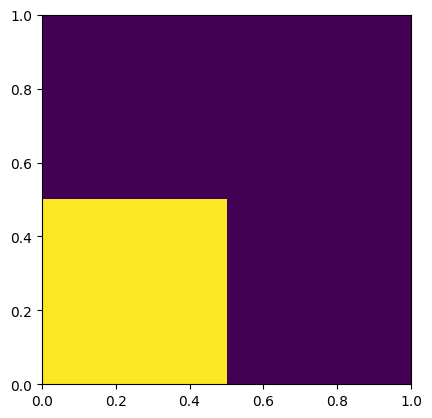

In [27]:
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

x_list = coords_x.detach().numpy()
y_list = coords_y.detach().numpy()
z_list = datas[500].detach().numpy()

f = interp2d(x_list,y_list,z_list,kind="linear")

/tmp/ipykernel_15349/750286116.py:3: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see
        `https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  Z = f(x_coords,y_coords)


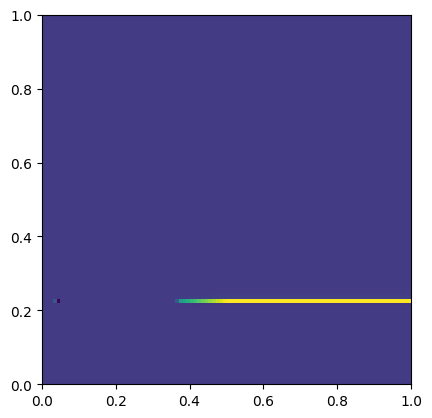

In [36]:
x_coords = np.linspace(min(x_list),max(x_list)+1,100)
y_coords = np.linspace(min(y_list),max(y_list)+1,100)
Z = f(x_coords,y_coords)

fig = plt.imshow(Z,
           extent=[min(x_list),max(x_list),min(y_list),max(y_list)],
           origin="lower")

# Show the positions of the sample points, just to have some reference
fig.axes.set_autoscale_on(False)
plt.scatter(x_list,y_list,400,facecolors='none')